In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

print(y_train[0])
#print(x_train_raw.shape, y_trainra_w.shape)
#print(x_test_raw.shape, y_test_raw.shape)

#Convert the labels into one-hot codes.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])


11490434/11490434 [==============================] - 0s 0us/step
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


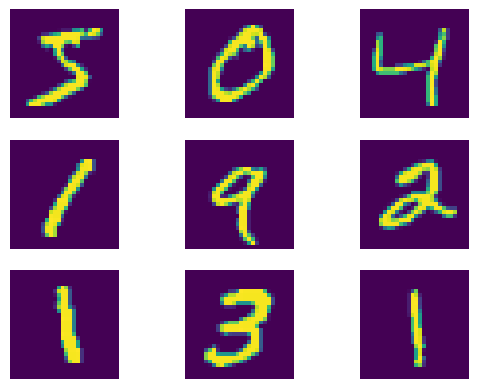

In [2]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    #plt.ylabel(y[i].numpy())
    plt.axis('off')
plt.show()


In [3]:
model=keras.Sequential() #Create a network sequence.
##Add the first convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=32,kernel_size = 5,strides = (1,1),
                              padding = 'same',activation = tf.nn.relu,input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add the second convolutional layer and pooling layer.
model.add(keras.layers.Conv2D(filters=64,kernel_size = 3,strides = (1,1),padding = 'same',activation = tf.nn.relu))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding = 'valid'))
##Add a dropout layer to reduce overfitting.
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
##Add two fully connected layers.
model.add(keras.layers.Dense(units=128,activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=10,activation = tf.nn.softmax))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7a73d00962f0>>

In [4]:
#Expand data dimensions to adapt to the CNN model.
X_train=x_train.reshape(60000,28,28,1)
X_test=x_test.reshape(10000,28,28,1)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit(x=X_train,y=y_train,epochs=5,batch_size=128)



Epoch 1/5
469/469 [==============================] - 21s 9ms/step - loss: 0.9438 - accuracy: 0.8064
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1830 - accuracy: 0.9463
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1277 - accuracy: 0.9634
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1073 - accuracy: 0.9693
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0960 - accuracy: 0.9718


In [5]:
model.save('./model/final_DNN_model.h5')




/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


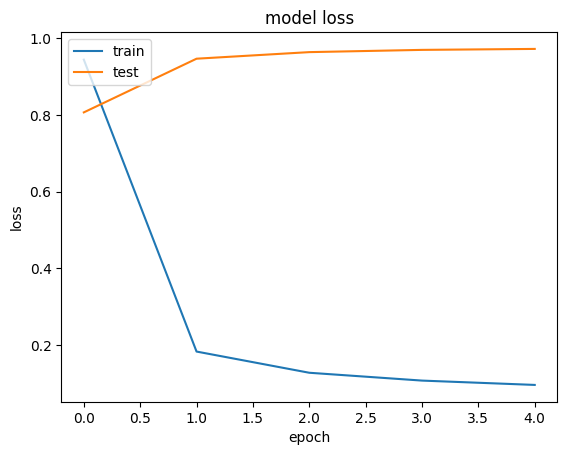

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 144ms/step
prediction results of the first 5 images:
7,2,1,0,4,	
first 5 images in the test set:


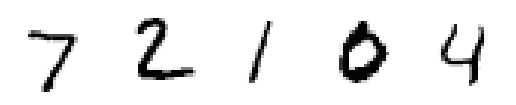

In [7]:
#Visualize test set output results.
import matplotlib.pyplot as plt
%matplotlib inline
def res_Visual(n):
    final_opt_a=model.predict(X_test[0:n])#Perform predictions on the test set by using the model.
    fig, ax = plt.subplots(nrows=int(n/5),ncols=5 )
    ax = ax.flatten()
    print('prediction results of the first {} images:'.format(n))
    for i in range(n):
        #print(final_opt_a[i],end=',')
        print(np.argmax(final_opt_a[i]), end=',')
        if int((i+1)%5) ==0:
            print('\t')
        #Visualize image display.
        img = X_test[i].reshape((28,28))#Read each row of data in the format of Ndarry.
        plt.axis("off")
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')#Visualization
        ax[i].axis("off")
    print('first {} images in the test set:'.format(n))
res_Visual(5)
